# Superdense coding
A. Windisch, Mar 2022

In [1]:
# imports
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

In [2]:
def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a,b) # apply cnot gate using first quibit as control and second as target

In [3]:
def encode_message(qc, qubit, msg):
    if msg == "00":
        pass # to send 00, nothing happens
    elif msg == "10":
        qc.x(qubit)
    elif msg == "01":
        qc.z(qubit)
    elif msg == "11":
        qc.z(qubit)
        qc.x(qubit)
    else:
        print("invalid message; sending '00'")

In [4]:
def decode_message(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

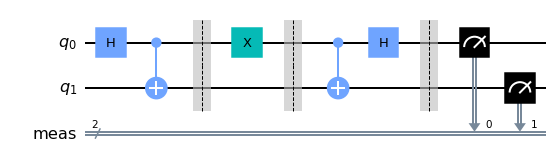

In [6]:
# create quantum circuit
qc = QuantumCircuit(2)

# first, Charlie creates the entangled pair
create_bell_pair(qc, 0, 1)
qc.barrier() # this adds a visual barrier to the circuit for easier reading

# next the qubits are separated

# next, Alice encodes her message
message = "10"
encode_message(qc, 0, message)
qc.barrier()

# next, the Alice's qubit is sent to Bob

# next, Bob decodes the message
decode_message(qc, 0, 1)

# finally, Bob measures all qubits in the system
qc.measure_all()

# Draw. output
qc.draw('mpl')

{'10': 1024}


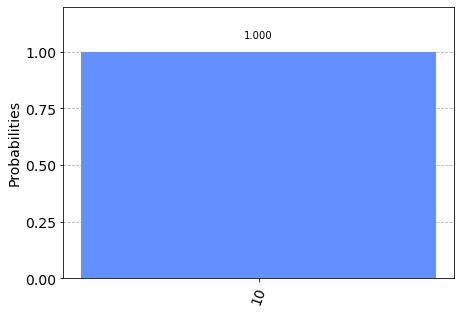

In [8]:
aer_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)